In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv('medical.csv')
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [19]:
#Data Info
print(data.info())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
Appoi

In [20]:
#fixing no show into binary
print(data['No-show'].value_counts())
print(type(data['No-show'][0]))

No     88208
Yes    22319
Name: No-show, dtype: int64
<class 'str'>


In [21]:
data['No-show']= [0 if x =='No'else 1 for x in data['No-show']]
print(data['No-show'].value_counts())

0    88208
1    22319
Name: No-show, dtype: int64


In [22]:
#check uniques
for col in data.columns:
    print(col,len(data[col].unique()))

PatientId 62299
AppointmentID 110527
Gender 2
ScheduledDay 103549
AppointmentDay 27
Age 104
Neighbourhood 81
Scholarship 2
Hipertension 2
Diabetes 2
Alcoholism 2
Handcap 5
SMS_received 2
No-show 2


In [23]:
#remove unnecassry columns
data.drop(['PatientId','AppointmentID'],axis=1, inplace=True)
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [24]:
#fixing years
data['ScheduledDay']=pd.to_datetime(data['ScheduledDay']) 
data['AppointmentDay']=pd.to_datetime(data['AppointmentDay']) 

In [25]:
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


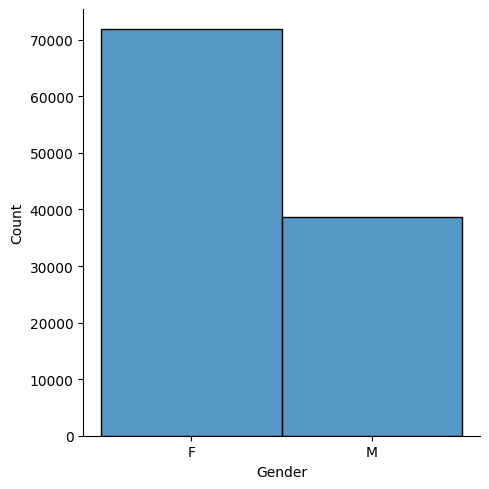

In [26]:
sns.displot(data=data['Gender'])
#female favored clinic :D

2015-11-10 07:13:56+00:00
2016-06-08 20:07:23+00:00


<AxesSubplot:xlabel='ScheduledDay', ylabel='Density'>

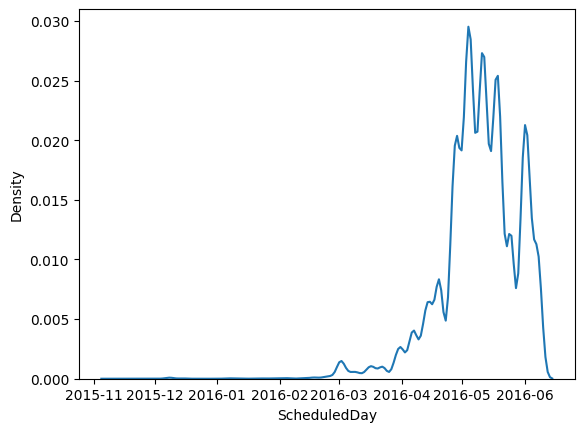

In [27]:
print(data['ScheduledDay'].min())
print(data['ScheduledDay'].max())
sns.kdeplot(data = data['ScheduledDay'])
#started taking appointments on 10/11/2015 and finished on 8/6/2016 
#hmmmmmmmmmm

In [28]:
print(data['ScheduledDay'].dt.year.value_counts())
data=data[data['ScheduledDay'].dt.year==2016]
print(data['ScheduledDay'].dt.year.value_counts())
#remove 2015 

2016    110465
2015        62
Name: ScheduledDay, dtype: int64
2016    110465
Name: ScheduledDay, dtype: int64


<AxesSubplot:xlabel='ScheduledDay', ylabel='Density'>

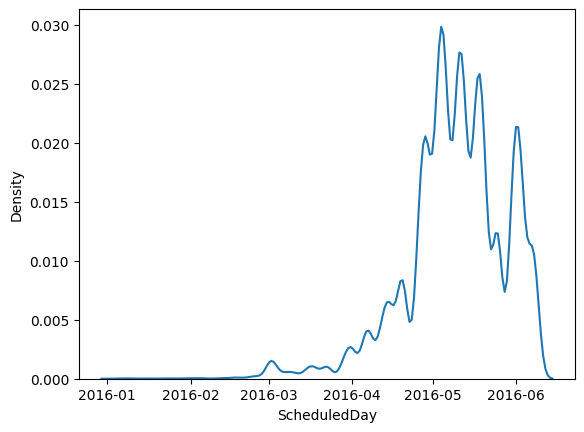

In [29]:
sns.kdeplot(data = data['ScheduledDay'])
#can still do better

In [31]:
print(data['ScheduledDay'].dt.year.value_counts())
data=data[data['ScheduledDay'].dt.month>=4]
print(data['ScheduledDay'].dt.year.value_counts())

2016    110465
Name: ScheduledDay, dtype: int64
2016    106510
Name: ScheduledDay, dtype: int64


<AxesSubplot:xlabel='ScheduledDay', ylabel='Density'>

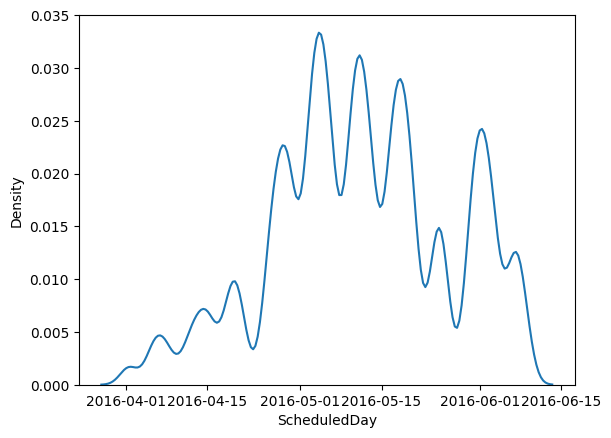

In [32]:
sns.kdeplot(data = data['ScheduledDay'])
#pretty good

<AxesSubplot:xlabel='ScheduledDay', ylabel='Density'>

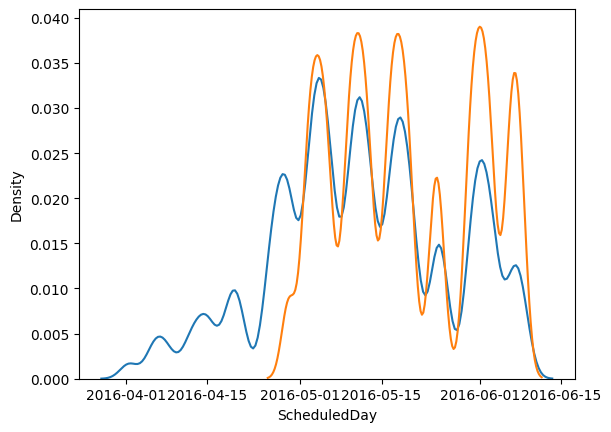

In [33]:
sns.kdeplot(data = data['ScheduledDay'])
sns.kdeplot(data=data['AppointmentDay'])
#scheduling rate was better on appointments days

In [162]:
Alcoholism = data[data['Alcoholism'] ==1]
Handcap = data[data['Scholarship'] ==1]
Hypertension = data[data['Hipertension'] ==1]
Diabetes = data[data['Diabetes'] ==1]


In [151]:
Alcoholism['Age'].describe()
#mean 49 years for alcohol
#a 4 year old is alcholic?

count    3309.000000
mean       49.576911
std        12.709760
min         4.000000
25%        41.000000
50%        50.000000
75%        59.000000
max        85.000000
Name: Age, dtype: float64

In [152]:
print(len(Alcoholism[Alcoholism['Age']<18]))
Alcoholism[Alcoholism['Age']<18].head()
#legal issues here?

24


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
1447,F,2016-04-08 11:44:04+00:00,2016-04-29 00:00:00+00:00,16,JESUS DE NAZARETH,1,0,0,1,0,1,1
6402,M,2016-05-11 07:32:26+00:00,2016-05-13 00:00:00+00:00,11,PARQUE MOSCOSO,1,0,0,1,0,0,0
17463,M,2016-05-13 07:21:38+00:00,2016-05-17 00:00:00+00:00,7,REDENÇÃO,0,0,0,1,0,0,0
17905,M,2016-05-02 14:47:48+00:00,2016-05-11 00:00:00+00:00,13,SANTA MARTHA,0,0,0,1,0,1,0
31206,M,2016-05-30 12:33:18+00:00,2016-05-30 00:00:00+00:00,15,PIEDADE,1,0,0,1,0,0,0


Text(0.5, 0, 'Age')

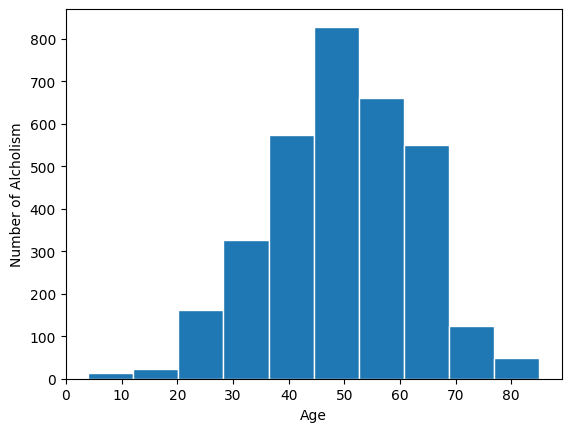

In [153]:
plt.hist(x=Alcoholism['Age'], ec='white')
plt.ylabel('Number of Alcholism', fontsize=10)
plt.xlabel('Age')


([<matplotlib.axis.XTick at 0x2400a1c44c0>,
 [Text(1, 0, 'Males'), Text(2, 0, 'Females')])

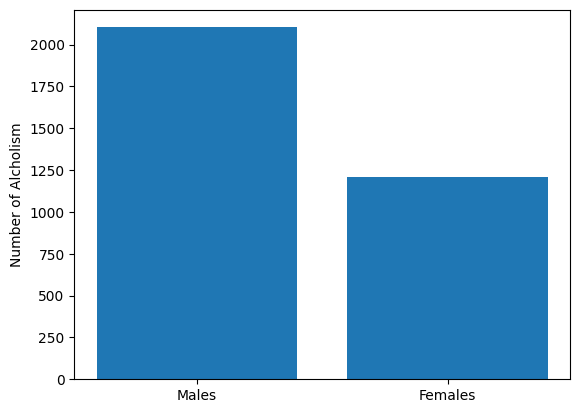

In [154]:
gender_of_alcoholism = [len(Alcoholism[Alcoholism['Gender']=='M']),len(Alcoholism[Alcoholism['Gender']=='F'])]
plt.bar([1,2],gender_of_alcoholism)
plt.ylabel('Number of Alcholism', fontsize=10)
plt.xticks([1,2], ['Males','Females'])

In [159]:
Handcap['Age'].describe()


count    10634.000000
mean        30.579932
std         17.393868
min          0.000000
25%         16.000000
50%         31.000000
75%         43.000000
max         84.000000
Name: Age, dtype: float64

Text(0.5, 0, 'Age')

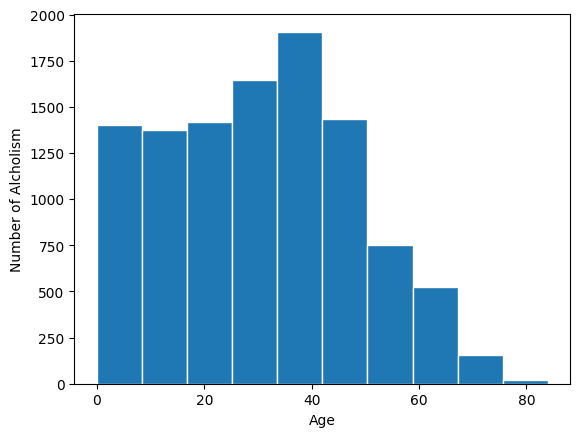

In [160]:
plt.hist(x=Handcap['Age'], ec='white')
plt.ylabel('Number of Alcholism', fontsize=10)
plt.xlabel('Age')

([<matplotlib.axis.XTick at 0x2400a4bf5b0>,
 [Text(1, 0, 'Males'), Text(2, 0, 'Females')])

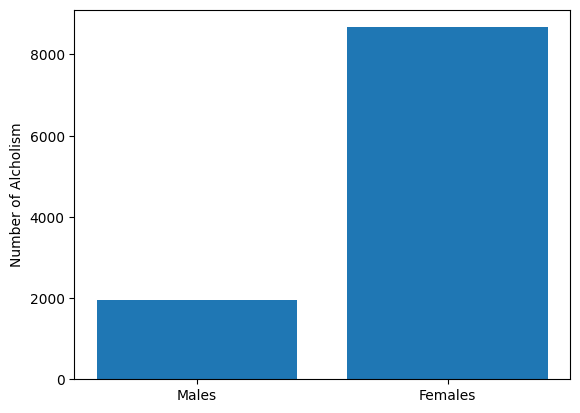

In [161]:
gender_of_handcap = [len(Handcap[Handcap['Gender']=='M']),len(Handcap[Handcap['Gender']=='F'])]
plt.bar([1,2],gender_of_handcap)
plt.ylabel('Number of Alcholism', fontsize=10)
plt.xticks([1,2], ['Males','Females'])

In [163]:
Hypertension['Age'].describe()


count    21023.000000
mean        60.493793
std         13.912869
min          4.000000
25%         51.000000
50%         61.000000
75%         70.000000
max        115.000000
Name: Age, dtype: float64

Text(0.5, 0, 'Age')

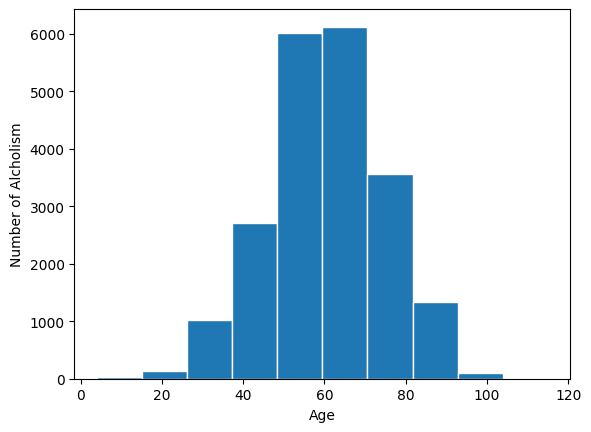

In [164]:
plt.hist(x=Hypertension['Age'], ec='white')
plt.ylabel('Number of Alcholism', fontsize=10)
plt.xlabel('Age')

([<matplotlib.axis.XTick at 0x2400a57be50>,
 [Text(1, 0, 'Males'), Text(2, 0, 'Females')])

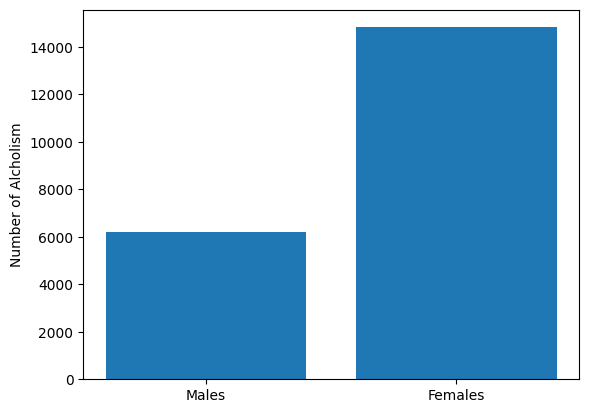

In [165]:
gender_of_hypertension = [len(Hypertension[Hypertension['Gender']=='M']),len(Hypertension[Hypertension['Gender']=='F'])]
plt.bar([1,2],gender_of_hypertension)
plt.ylabel('Number of Alcholism', fontsize=10)
plt.xticks([1,2], ['Males','Females'])

In [166]:
Diabetes['Age'].describe()


count    7694.000000
mean       61.301144
std        13.607357
min         1.000000
25%        53.000000
50%        62.000000
75%        70.000000
max        99.000000
Name: Age, dtype: float64

Text(0.5, 0, 'Age')

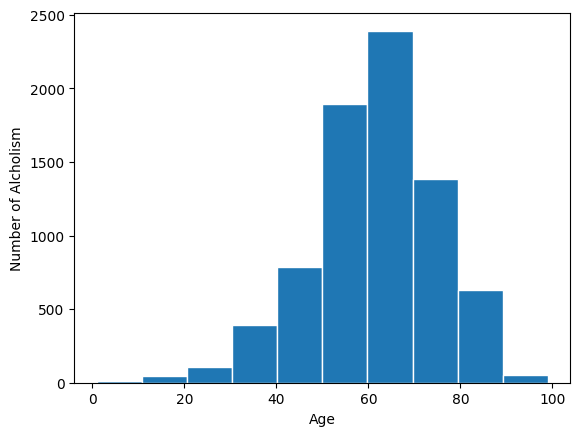

In [167]:
plt.hist(x=Diabetes['Age'], ec='white')
plt.ylabel('Number of Alcholism', fontsize=10)
plt.xlabel('Age')

([<matplotlib.axis.XTick at 0x2400a661570>,
 [Text(1, 0, 'Males'), Text(2, 0, 'Females')])

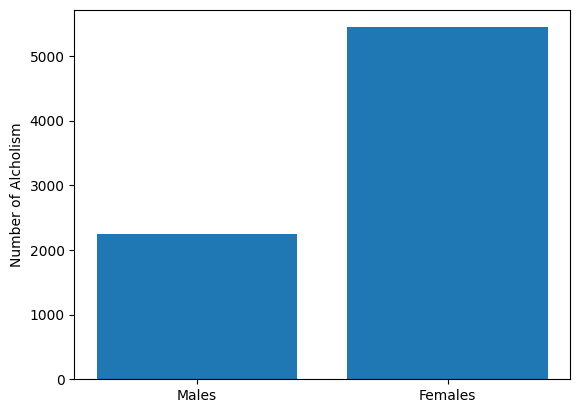

In [168]:
gender_of_diabetes = [len(Diabetes[Diabetes['Gender']=='M']),len(Diabetes[Diabetes['Gender']=='F'])]
plt.bar([1,2],gender_of_diabetes)
plt.ylabel('Number of Alcholism', fontsize=10)
plt.xticks([1,2], ['Males','Females'])

<AxesSubplot:>

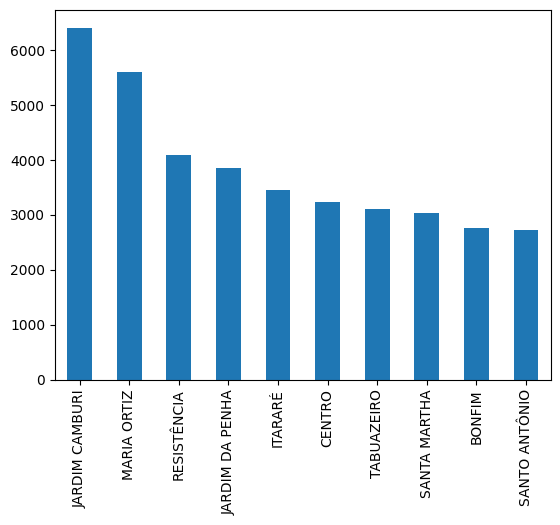

In [230]:
topTenNeighbourhoods =data['Neighbourhood'].value_counts().head(10)
topTenNeighbourhoods.plot.bar()

#top 10 Neighbourhoods

In [231]:
data['AppointmentDayName'] = data['AppointmentDay'].dt.day_name()
data.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppointmentDayName
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Friday
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Friday
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0,Friday
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Friday
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Friday


<AxesSubplot:xlabel='AppointmentDayName', ylabel='count'>

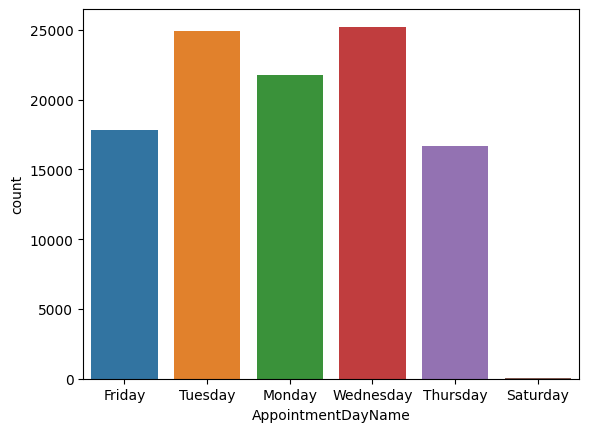

In [240]:
sns.countplot(data = data, x= 'AppointmentDayName')
#saturday is a probably off
#wednesdays and tuesdays are busy days

<AxesSubplot:xlabel='AppointmentDayName', ylabel='count'>

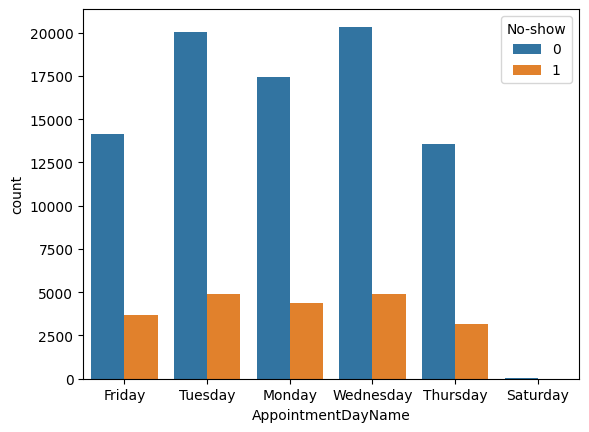

In [243]:
sns.countplot(data = data, x= 'AppointmentDayName', hue=data['No-show'])
